In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('wine.csv')

In [3]:
df = data.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB


array([[<AxesSubplot:title={'center':'points'}>,
        <AxesSubplot:title={'center':'price'}>]], dtype=object)

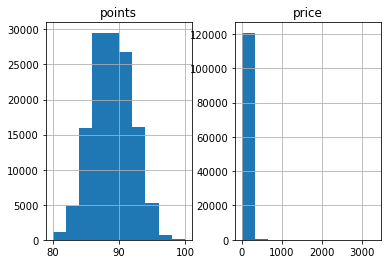

In [4]:
hist = df.hist()
hist

In [5]:
df['taster_name'].nunique()

19

In [6]:
df['price'].describe()

count    120975.000000
mean         35.363389
std          41.022218
min           4.000000
25%          17.000000
50%          25.000000
75%          42.000000
max        3300.000000
Name: price, dtype: float64

In [7]:
df.duplicated().value_counts()

False    119988
True       9983
dtype: int64

In [8]:
cols_null_precent = df.isnull().mean()*100
cols_with_null = cols_null_precent[cols_null_precent > 0].sort_values(ascending=False)
cols_with_null


region_2                 61.136715
designation              28.825661
taster_twitter_handle    24.015357
taster_name              20.192197
region_1                 16.347493
price                     6.921544
country                   0.048472
province                  0.048472
variety                   0.000769
dtype: float64

In [9]:
thresh = df.shape[0]*0.7
df = df.dropna(how='any', thresh=thresh, axis=1)
m = df.shape[1]
df = df.dropna(how='any', thresh=m-2, axis=0)

df['price'] = df['price'].fillna(df['price'].mean())

df = df.fillna('unknown')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119230 entries, 0 to 129970
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                119230 non-null  object 
 1   description            119230 non-null  object 
 2   designation            119230 non-null  object 
 3   points                 119230 non-null  int64  
 4   price                  119230 non-null  float64
 5   province               119230 non-null  object 
 6   region_1               119230 non-null  object 
 7   taster_name            119230 non-null  object 
 8   taster_twitter_handle  119230 non-null  object 
 9   title                  119230 non-null  object 
 10  variety                119230 non-null  object 
 11  winery                 119230 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 11.8+ MB
